In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline


In [3]:
#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split


In [4]:
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [11]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
df1 = df.iloc[:,0:15]
df1.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft


In [14]:
df1.insured_education_level	.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

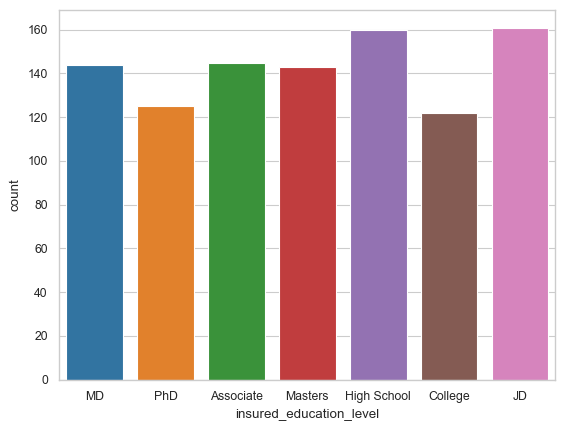

In [15]:
sns.countplot(data = df, x = "insured_education_level")

In [18]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type'],
      dtype='object')

In [20]:
df1.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_deductable            int64
policy_annual_premium      float64
umbrella_limit               int64
insured_sex                 object
insured_education_level     object
insured_occupation          object
insured_hobbies             object
insured_relationship        object
capital-gains                int64
capital-loss                 int64
incident_type               object
dtype: object

In [41]:
df1.drop(['insured_occupation','insured_hobbies'],axis=1,inplace=True)

In [46]:
cat_cols = ['insured_sex','incident_type','insured_relationship']
df2 = pd.get_dummies(df1,columns = cat_cols)

In [47]:
#Separate the Features and the Target Variable
x = df2.drop(["insured_education_level"], axis=1)
y = df2["insured_education_level"]

In [48]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [49]:
#NOTE: Only scale the predictor variables, NOT the target variable

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [50]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train_scaled,y_train)


GaussianNB()

In [51]:
#Predict on the Test Set
y_pred = gnb.predict(x_test_scaled)

y_pred


array(['PhD', 'College', 'College', 'PhD', 'Masters', 'College',
       'College', 'MD', 'High School', 'JD', 'High School', 'PhD',
       'Associate', 'High School', 'College', 'Masters', 'PhD', 'JD',
       'Masters', 'JD', 'MD', 'College', 'College', 'PhD', 'High School',
       'MD', 'MD', 'MD', 'Masters', 'JD', 'JD', 'Masters', 'Masters',
       'Masters', 'MD', 'PhD', 'College', 'High School', 'High School',
       'JD', 'Associate', 'High School', 'College', 'High School',
       'College', 'PhD', 'College', 'JD', 'Masters', 'PhD', 'Masters',
       'MD', 'MD', 'Masters', 'High School', 'Masters', 'MD', 'Associate',
       'Masters', 'Masters', 'College', 'PhD', 'High School', 'College',
       'PhD', 'High School', 'Masters', 'MD', 'PhD', 'MD', 'MD',
       'High School', 'JD', 'Masters', 'High School', 'JD', 'High School',
       'PhD', 'Masters', 'MD', 'Masters', 'High School', 'JD', 'Masters',
       'High School', 'High School', 'Associate', 'JD', 'PhD', 'JD', 'MD',
       

In [53]:
#Check performance metrics
print("Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred)))

Accuracy: 14.00%


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Associate       0.17      0.63      0.26        43
     College       0.25      0.03      0.05        33
 High School       0.11      0.02      0.04        46
          JD       0.32      0.17      0.23        40
          MD       0.14      0.08      0.11        36
     Masters       0.11      0.08      0.09        26
         PhD       0.00      0.00      0.00        26

    accuracy                           0.16       250
   macro avg       0.16      0.15      0.11       250
weighted avg       0.16      0.16      0.12       250



In [29]:
print (confusion_matrix(y_test, y_pred))

[[27  0  4  1  5  4  2]
 [18  1  1  3  3  5  2]
 [33  1  1  4  2  3  2]
 [24  2  0  7  3  2  2]
 [25  0  2  3  3  0  3]
 [20  0  0  1  1  2  2]
 [16  0  1  3  4  2  0]]


In [30]:
#Get probabilities
y_prob_df = pd.DataFrame(gnb.predict_proba(x_test_scaled), index=x_test.index, columns=gnb.classes_)

In [31]:
gnb.classes_

array(['Associate', 'College', 'High School', 'JD', 'MD', 'Masters',
       'PhD'], dtype='<U11')

In [32]:
y_prob_df

,Associate,College,High School,JD,MD,Masters,PhD
923,1.00,0.00,0.00,0.00,0.00,0.00,0.00
921,0.84,0.14,0.00,0.01,0.00,0.00,0.00
516,1.00,0.00,0.00,0.00,0.00,0.00,0.00
87,0.04,0.00,0.00,0.00,0.01,0.00,0.95
879,1.00,0.00,0.00,0.00,0.00,0.00,0.00
463,0.98,0.02,0.00,0.00,0.00,0.00,0.00
112,0.86,0.00,0.01,0.13,0.00,0.00,0.00
297,0.00,0.01,0.00,0.00,0.00,0.04,0.94
417,1.00,0.00,0.00,0.00,0.00,0.00,0.00
658,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
#View original test dataset with results for easier analysis
df_results = x_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred
new_df = df_results.join(y_prob_df)

new_df.head(10)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,Class,Predicted,Associate,College,High School,JD,MD,Masters,PhD
923,90,31,524215,2000,951.27,0,42100,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,PhD,Associate,1.00,0.00,0.00,0.00,0.00,0.00,0.00
921,178,38,987524,500,1381.14,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,College,Associate,0.84,0.14,0.00,0.01,0.00,0.00,0.00
516,65,27,538955,1000,1164.97,0,43000,-42500,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,College,Associate,1.00,0.00,0.00,0.00,0.00,0.00,0.00
87,134,32,614763,500,1612.43,0,36400,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,MD,PhD,0.04,0.00,0.00,0.00,0.01,0.00,0.95
879,338,47,884180,500,1143.46,4000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,MD,Associate,1.00,0.00,0.00,0.00,0.00,0.00,0.00
463,218,41,461962,500,914.22,0,37900,-72900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,JD,Associate,0.98,0.02,0.00,0.00,0.00,0.00,0.00
112,210,41,395269,500,1222.75,0,0,-41000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,High School,Associate,0.86,0.00,0.01,0.13,0.00,0.00,0.00
297,247,39,419954,500,806.31,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,College,PhD,0.00,0.01,0.00,0.00,0.00,0.04,0.94
417,186,37,165565,2000,1628.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,JD,Associate,1.00,0.00,0.00,0.00,0.00,0.00,0.00
658,303,43,674485,1000,671.01,7000000,42900,-61500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Associate,Associate,1.00,0.00,0.00,0.00,0.00,0.00,0.00
